In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

In [2]:
#| eval: true
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Simple neural network for image classification
class SimpleNet(nn.Module):
    def __init__(self, num_classes=2):  # 2 classes: cat vs dog
        super(SimpleNet, self).__init__()
        
        # Flatten 224x224x3 image to 150,528 features
        self.flatten = nn.Flatten()
        
        # Simple fully connected layers
        self.fc1 = nn.Linear(224 * 224 * 3, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(512, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.dropout1(self.relu1(self.fc1(x)))
        x = self.dropout2(self.relu2(self.fc2(x)))
        x = self.fc3(x)
        return x

# Create the network
simple_net = SimpleNet(num_classes=2)
print("Simple Neural Network:")
print(simple_net)

# Count parameters
total_params = sum(p.numel() for p in simple_net.parameters())
print(f"\nTotal parameters: {total_params:,}")

Simple Neural Network:
SimpleNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=150528, out_features=512, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)

Total parameters: 77,136,770


In [3]:
#| eval: true
class ConvNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ConvNet, self).__init__()
        
        # Convolutional layers (feature extractors)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        
        # Pooling layers (downsampling)
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully connected layers (classifier)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)  # 224/8 = 28 after 3 pooling layers
        self.fc2 = nn.Linear(512, num_classes)
        
        # Activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        # Feature extraction
        x = self.pool(self.relu(self.conv1(x)))  # 224x224 -> 112x112
        x = self.pool(self.relu(self.conv2(x)))  # 112x112 -> 56x56
        x = self.pool(self.relu(self.conv3(x)))  # 56x56 -> 28x28
        
        # Flatten and classify
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        
        return x

# Create CNN
cnn = ConvNet(num_classes=2)
print("Convolutional Neural Network:")
print(cnn)

# Count parameters
cnn_params = sum(p.numel() for p in cnn.parameters())
print(f"\nCNN parameters: {cnn_params:,}")
print(f"Simple net parameters: {total_params:,}")
print(f"CNN has {(total_params - cnn_params) / total_params * 100:.1f}% fewer parameters!")

Convolutional Neural Network:
ConvNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

CNN parameters: 51,475,010
Simple net parameters: 77,136,770
CNN has 33.3% fewer parameters!


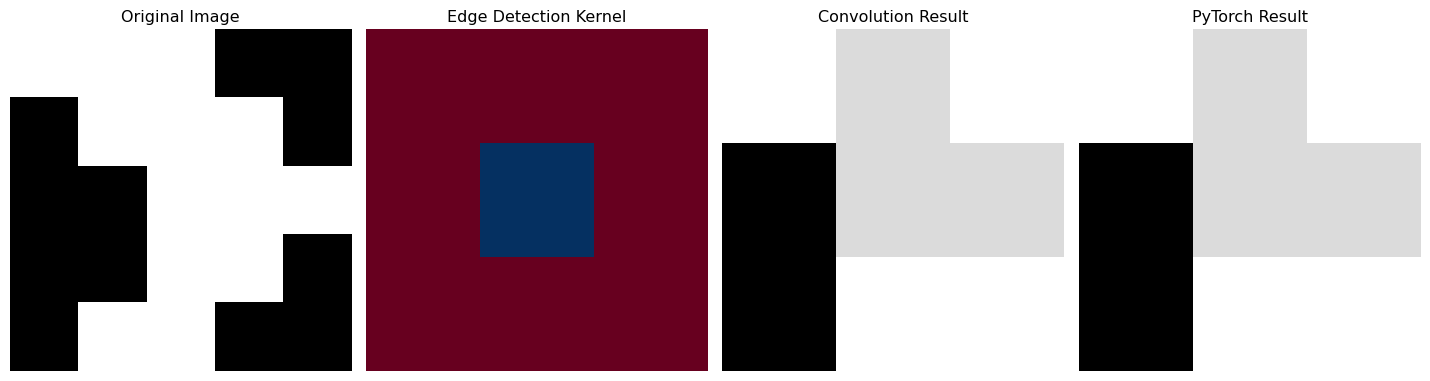

In [4]:
#| eval: true
def visualize_convolution():
    """Show how convolution works"""
    # Create a simple image
    image = np.array([
        [1, 1, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 0],
        [0, 1, 1, 0, 0]
    ])
    
    # Edge detection kernel
    kernel = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ])
    
    # Apply convolution manually
    result = np.zeros((3, 3))
    
    plt.figure(figsize=(15, 5))
    
    # Show original image
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    # Show kernel
    plt.subplot(1, 4, 2)
    plt.imshow(kernel, cmap='RdBu')
    plt.title("Edge Detection Kernel")
    plt.axis('off')
    
    # Show convolution process
    for i in range(3):
        for j in range(3):
            patch = image[i:i+3, j:j+3]
            result[i, j] = np.sum(patch * kernel)
    
    plt.subplot(1, 4, 3)
    plt.imshow(result, cmap='gray')
    plt.title("Convolution Result")
    plt.axis('off')
    
    # Show using PyTorch
    image_tensor = torch.FloatTensor(image).unsqueeze(0).unsqueeze(0)
    kernel_tensor = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
    
    conv_layer = nn.Conv2d(1, 1, 3, bias=False)
    conv_layer.weight.data = kernel_tensor
    
    pytorch_result = conv_layer(image_tensor).squeeze().detach().numpy()
    
    plt.subplot(1, 4, 4)
    plt.imshow(pytorch_result, cmap='gray')
    plt.title("PyTorch Result")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_convolution()

In [5]:
#| eval: true
import torchvision.models as models

# Load a pre-trained ResNet model
pretrained_model = models.resnet18(pretrained=True)
print("Pre-trained ResNet-18:")
print(pretrained_model)

# Modify for our task (cat vs dog classification)
num_classes = 2
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)

print(f"\nModified final layer for {num_classes} classes")
print(f"Final layer: {pretrained_model.fc}")

# Freeze early layers (optional)
for param in pretrained_model.parameters():
    param.requires_grad = False

# Only train the final layer
for param in pretrained_model.fc.parameters():
    param.requires_grad = True

trainable_params = sum(p.numel() for p in pretrained_model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in pretrained_model.parameters())

print(f"\nTrainable parameters: {trainable_params:,}")
print(f"Total parameters: {total_params:,}")
print(f"Training only {trainable_params/total_params*100:.1f}% of parameters!")

Pre-trained ResNet-18:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu)

/home/hasan/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/home/hasan/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.



In [6]:
#| eval: true
class ImageClassifier:
    def __init__(self, model_name='resnet18', num_classes=2):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")
        
        # Load pre-trained model
        if model_name == 'resnet18':
            self.model = models.resnet18(pretrained=True)
            self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
        
        self.model = self.model.to(self.device)
        
        # Define transforms
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])
        ])
        
        self.classes = ['cat', 'dog']  # Update based on your classes
    
    def predict(self, image):
        """Predict class of a single image"""
        self.model.eval()
        
        # Preprocess image
        if isinstance(image, np.ndarray):
            from PIL import Image
            image = Image.fromarray(image)
        
        input_tensor = self.transform(image).unsqueeze(0).to(self.device)
        
        # Make prediction
        with torch.no_grad():
            outputs = self.model(input_tensor)
            probabilities = torch.softmax(outputs, dim=1)
            predicted_class = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class].item()
        
        return {
            'class': self.classes[predicted_class],
            'confidence': confidence,
            'probabilities': probabilities.cpu().numpy()[0]
        }
    
    def predict_batch(self, images):
        """Predict classes for multiple images"""
        results = []
        for image in images:
            result = self.predict(image)
            results.append(result)
        return results

# Create classifier
classifier = ImageClassifier()

# Test with a sample image (you would load your own)
def test_classifier(image_path):
    from PIL import Image
    
    # Load image
    image = Image.open(image_path)
    
    # Make prediction
    result = classifier.predict(image)
    
    # Display result
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Input Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.bar(classifier.classes, result['probabilities'])
    plt.title(f"Prediction: {result['class']} ({result['confidence']:.2f})")
    plt.ylabel("Probability")
    
    plt.tight_layout()
    plt.show()
    
    return result

# Test the classifier
# result = test_classifier('your_image.jpg')

Using device: cuda


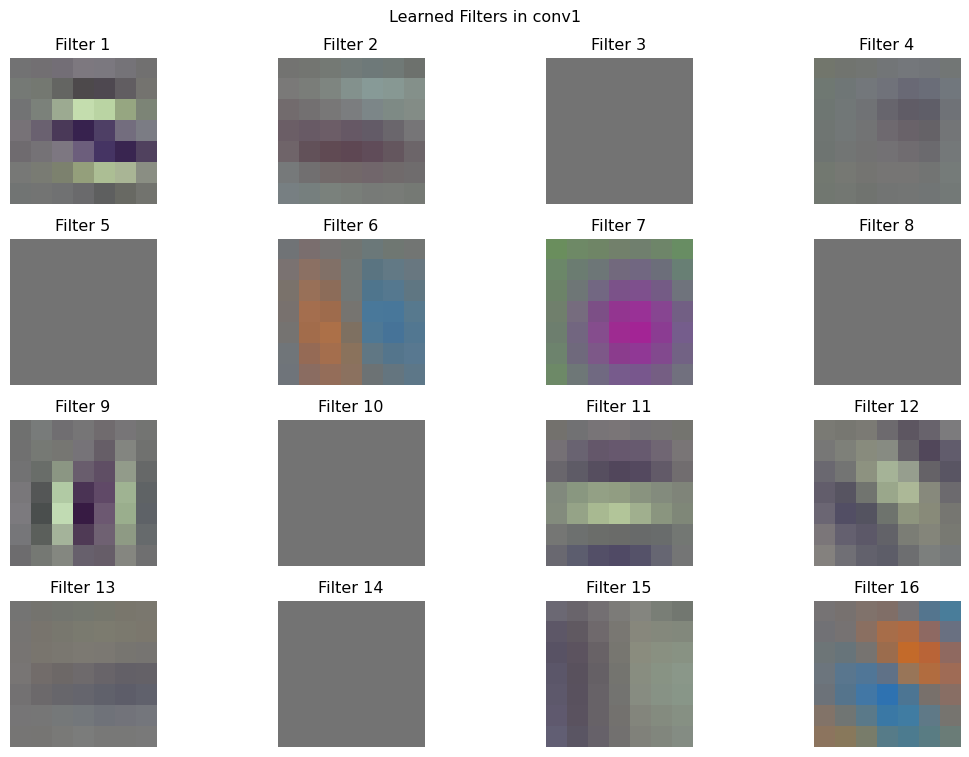

In [7]:
#| eval: true
def visualize_filters(model, layer_name='conv1'):
    """Visualize the filters learned by a convolutional layer"""
    
    # Get the layer
    layer = dict(model.named_modules())[layer_name]
    
    # Get the weights
    weights = layer.weight.data.cpu()
    
    # Normalize weights for visualization
    weights = (weights - weights.min()) / (weights.max() - weights.min())
    
    # Plot filters
    num_filters = min(16, weights.shape[0])  # Show first 16 filters
    
    plt.figure(figsize=(12, 8))
    
    for i in range(num_filters):
        plt.subplot(4, 4, i + 1)
        
        if weights.shape[1] == 3:  # RGB filters
            # Transpose from (C, H, W) to (H, W, C)
            filter_img = weights[i].permute(1, 2, 0)
            plt.imshow(filter_img)
        else:  # Grayscale filters
            plt.imshow(weights[i, 0], cmap='gray')
        
        plt.title(f"Filter {i+1}")
        plt.axis('off')
    
    plt.suptitle(f"Learned Filters in {layer_name}")
    plt.tight_layout()
    plt.show()

# Visualize filters from our pre-trained model
visualize_filters(pretrained_model, 'conv1')

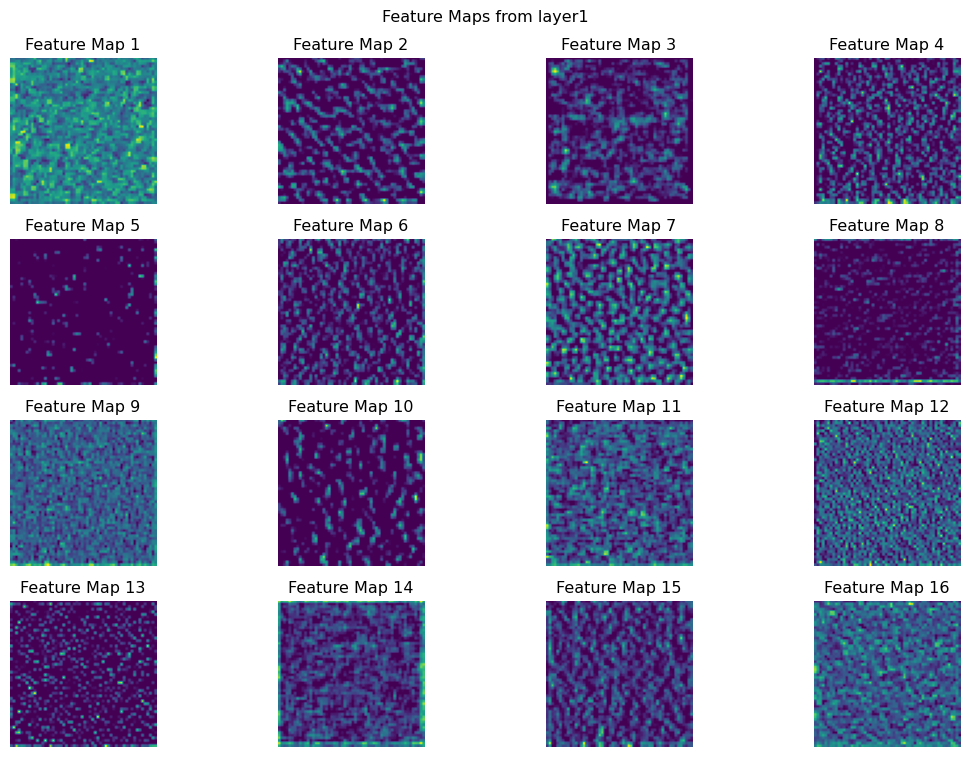

In [8]:
#| eval: true
def visualize_feature_maps(model, image, layer_name='layer1'):
    """Visualize feature maps from a specific layer"""
    
    # Hook to capture feature maps
    feature_maps = []
    
    def hook_fn(module, input, output):
        feature_maps.append(output.cpu())
    
    # Register hook
    layer = dict(model.named_modules())[layer_name]
    hook = layer.register_forward_hook(hook_fn)
    
    # Forward pass
    model.eval()
    with torch.no_grad():
        _ = model(image.unsqueeze(0))
    
    # Remove hook
    hook.remove()
    
    # Get feature maps
    fmaps = feature_maps[0].squeeze(0)  # Remove batch dimension
    
    # Plot feature maps
    num_maps = min(16, fmaps.shape[0])
    
    plt.figure(figsize=(12, 8))
    
    for i in range(num_maps):
        plt.subplot(4, 4, i + 1)
        plt.imshow(fmaps[i], cmap='viridis')
        plt.title(f"Feature Map {i+1}")
        plt.axis('off')
    
    plt.suptitle(f"Feature Maps from {layer_name}")
    plt.tight_layout()
    plt.show()

# Create a sample input
sample_input = torch.randn(3, 224, 224)
visualize_feature_maps(pretrained_model, sample_input)

In [9]:
#| eval: true
def compare_approaches(image):
    """Compare classical and deep learning approaches"""
    
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    
    # Classical approach: hand-crafted features
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Edge features
    edges = cv2.Canny(gray, 50, 150)
    plt.subplot(2, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Classical: Edge Features")
    plt.axis('off')
    
    # Texture features (using LBP-like approach)
    from skimage.feature import local_binary_pattern
    lbp = local_binary_pattern(gray, 24, 8, method='uniform')
    plt.subplot(2, 3, 3)
    plt.imshow(lbp, cmap='gray')
    plt.title("Classical: Texture Features")
    plt.axis('off')
    
    # Deep learning approach: learned features
    # Transform image for the model
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    input_tensor = transform(image).unsqueeze(0)
    
    # Get feature maps from different layers
    feature_maps = []
    
    def get_features(name):
        def hook(model, input, output):
            feature_maps.append((name, output.cpu()))
        return hook
    
    # Register hooks
    pretrained_model.layer1.register_forward_hook(get_features('Low-level'))
    pretrained_model.layer3.register_forward_hook(get_features('Mid-level'))
    pretrained_model.layer4.register_forward_hook(get_features('High-level'))
    
    # Forward pass
    pretrained_model.eval()
    with torch.no_grad():
        _ = pretrained_model(input_tensor)
    
    # Visualize learned features
    for i, (name, fmaps) in enumerate(feature_maps):
        plt.subplot(2, 3, 4 + i)
        # Average across channels for visualization
        avg_fmap = torch.mean(fmaps.squeeze(0), dim=0)
        plt.imshow(avg_fmap, cmap='viridis')
        plt.title(f"Deep Learning: {name} Features")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Compare approaches (you would use your own image)
# compare_approaches(your_image)

In [10]:
#| eval: true
class ModernVisionPipeline:
    def __init__(self):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # 1. Data preprocessing
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.5),  # Data augmentation
            transforms.RandomRotation(10),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])
        ])
        
        # 2. Model architecture
        self.model = models.resnet50(pretrained=True)
        
        # 3. Transfer learning setup
        # Freeze early layers
        for param in list(self.model.parameters())[:-10]:
            param.requires_grad = False
        
        # 4. Optimizer and loss
        self.optimizer = optim.Adam(
            filter(lambda p: p.requires_grad, self.model.parameters()),
            lr=0.001
        )
        self.criterion = nn.CrossEntropyLoss()
    
    def train_step(self, images, labels):
        """Single training step"""
        self.model.train()
        
        # Forward pass
        outputs = self.model(images)
        loss = self.criterion(outputs, labels)
        
        # Backward pass
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        return loss.item()
    
    def evaluate(self, images, labels):
        """Evaluation step"""
        self.model.eval()
        
        with torch.no_grad():
            outputs = self.model(images)
            _, predicted = torch.max(outputs, 1)
            accuracy = (predicted == labels).float().mean()
        
        return accuracy.item()

# Create modern pipeline
pipeline = ModernVisionPipeline()
print("Modern deep learning pipeline ready!")

/home/hasan/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.



Modern deep learning pipeline ready!
